In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN


In [2]:
dataset = pd.read_csv("Mall_Customers.csv")
X = dataset.iloc[:, [3, 4]].values

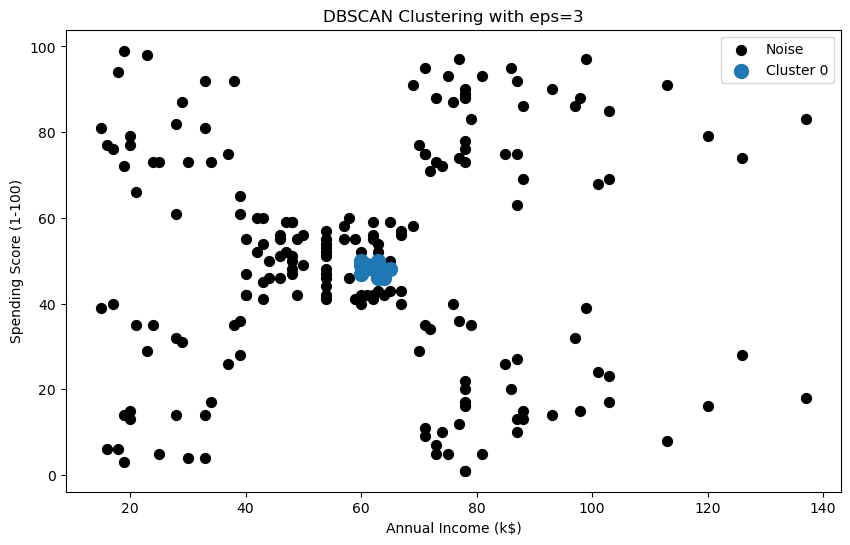

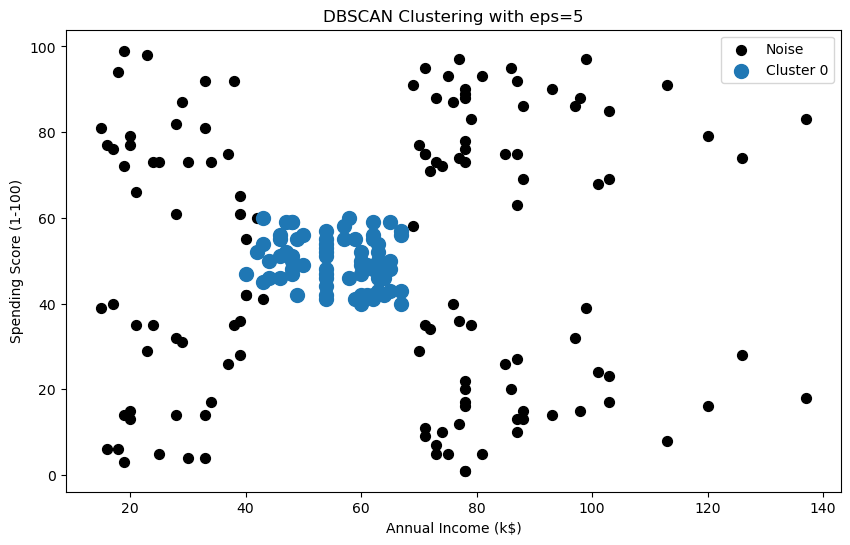

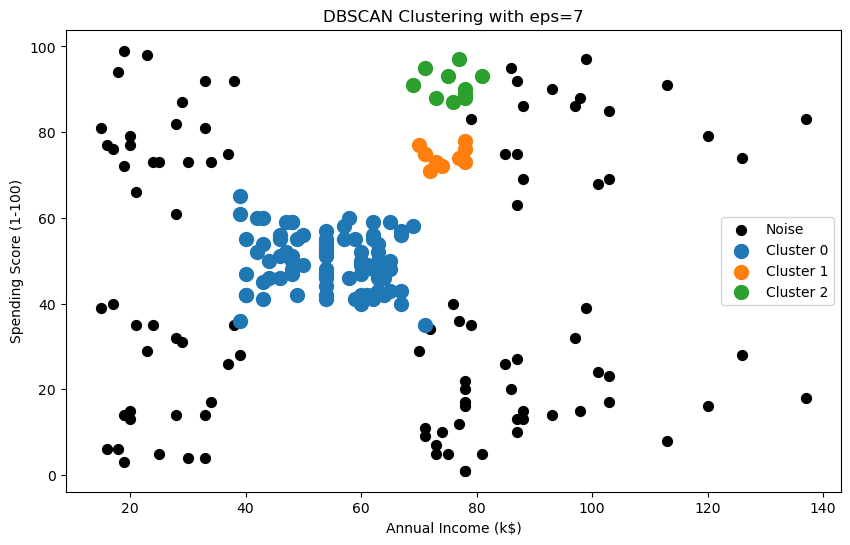

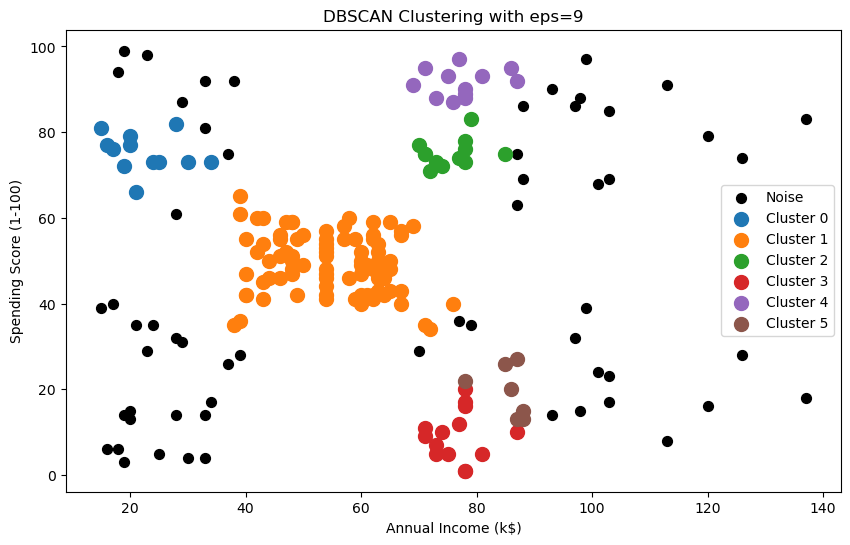

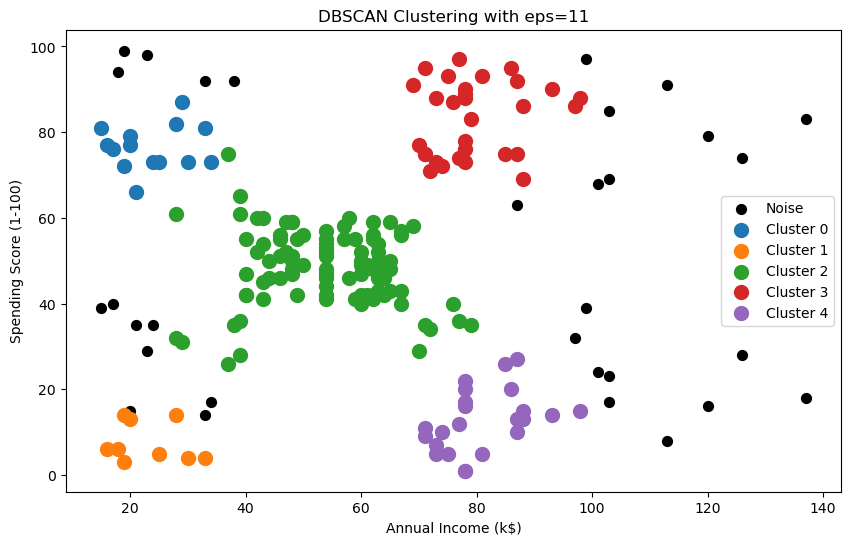

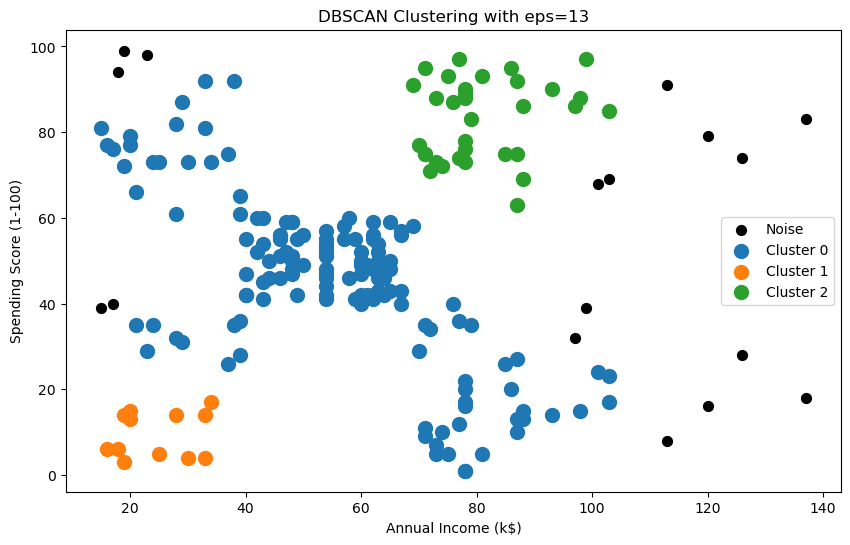

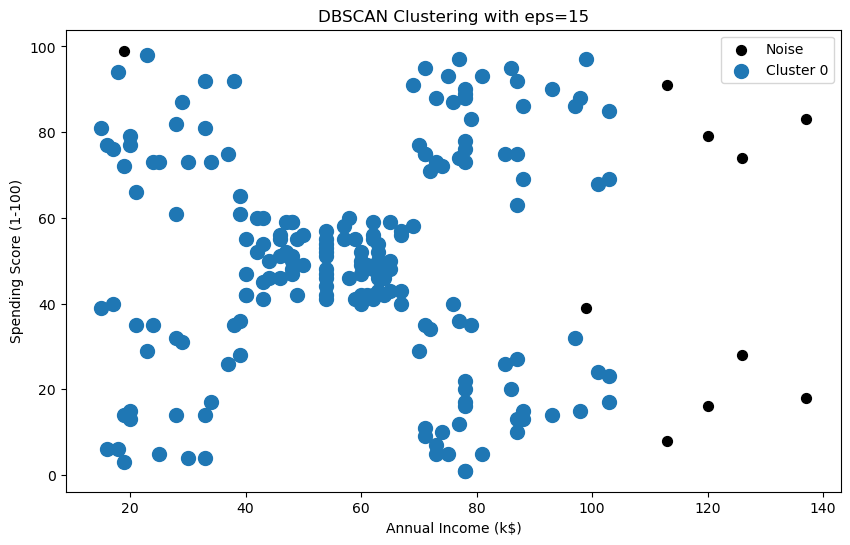

In [3]:
# DBSCAN parameters
eps_values = [3, 5, 7, 9, 11, 13, 15]
min_samples = 9

# Performing DBSCAN clustering for each eps value
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(X)
    
    # Unique labels (clusters)
    unique_labels = np.unique(dbscan_labels)
    
    # Plotting the results
    plt.figure(figsize=(10, 6))
    for label in unique_labels:
        # Get points in the cluster
        points = X[dbscan_labels == label]
        if label == -1:
            # Noise points
            plt.scatter(points[:, 0], points[:, 1], s=50, c='black', label='Noise')
        else:
            plt.scatter(points[:, 0], points[:, 1], s=100, label=f'Cluster {label}')
    
    plt.title(f'DBSCAN Clustering with eps={eps}')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend()
    plt.show()